# Setup

In [4]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

"In this chapter, we will start by looking at the Linear Regression model, one of the  
simplest models there is. We will discuss two very different ways to train it:  
- Using a direct “closed-form” equation that directly computes the model parameters  
that best fit the model to the training set (i.e., the model parameters that  
minimize the cost function over the training set).  
- Using an iterative optimization approach, called Gradient Descent (GD), that  
gradually tweaks the model parameters to minimize the cost function over the  
training set, eventually converging to the same set of parameters as the first  
method. We will look at a few variants of Gradient Descent that we will use again  
and again when we study neural networks in Part II: Batch GD, Mini-batch GD,  
and Stochastic GD." 


"Next we will look at Polynomial Regression, a more complex model that can fit nonlinear  
datasets. Since this model has more parameters than Linear Regression, it is  
more prone to overfitting the training data, so we will look at how to detect whether  
or not this is the case, using learning curves, and then we will look at several regularization  
techniques that can reduce the risk of overfitting the training set."  

"Finally, we will look at two more models that are commonly used for classification  
tasks: Logistic Regression and Softmax Regression." 

# Linear Regression Using the Normal Equation 

![title](images/1.png)
![title](images/2.png)


"In Chapter 2 we saw that the most common performance measure  
of a regression model is the Root Mean Square Error (RMSE) (Equation 2-1). Therefore,  
to train a Linear Regression model, you need to find the value of θ that minimizes  
the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE)  
than the RMSE, and it leads to the same result (because the value that minimizes a  
function also minimizes its square root)."

![title](images/3.png)


# # Linear Regression Using the Normal Equation

![title](images/4.png)



Generating some random data

In [5]:

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


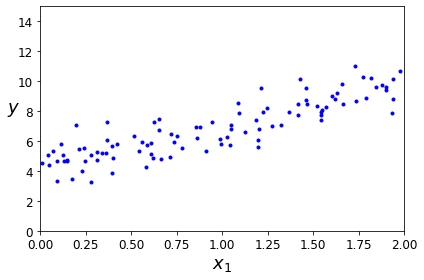

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [10]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X] 
# Equation above!
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

"The actual function that we used to generate the data is y = 4 + 3x0 + Gaussian noise.  
Let’s see what the equation found:"

In [11]:
theta_best


array([[4.21509616],
       [2.77011339]])

"We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close  
enough, but the noise made it impossible to recover the exact parameters of the original  
function"

"Now you can make predictions using θ:"

In [13]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

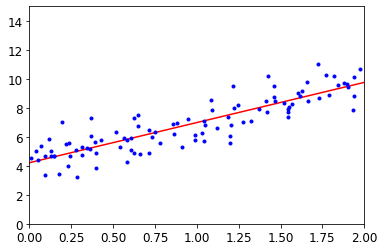

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [17]:
lin_reg.predict(X_new)


array([[4.21509616],
       [9.75532293]])

"The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:"

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

"This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the   Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:"

In [19]:
np.linalg.pinv(X_b).dot(y)


array([[4.21509616],
       [2.77011339]])

## Computational Complexity

"The Normal Equation computes the inverse of XT · X, which is an n × n matrix  
(where n is the number of features). The computational complexity of inverting such a  
matrix is typically about O(n2.4) to O(n3) (depending on the implementation). In  
other words, if you double the number of features, you multiply the computation  
time by roughly 22.4 = 5.3 to 23 = 8."

WARNING: "The Normal Equation gets very slow when the number of features  
grows large (e.g., 100,000)."

"On the positive side, this equation is linear with regards to the number of instances in  
the training set (it is O(m)), so it handles large training sets efficiently, provided they  
can fit in memory."

"Also, once you have trained your Linear Regression model (using the Normal Equation  
or any other algorithm), predictions are very fast: the computational complexity  
is linear with regards to both the number of instances you want to make predictions  
on and the number of features. In other words, making predictions on twice as many  
instances (or twice as many features) will just take roughly twice as much time."

"Now we will look at very different ways to train a Linear Regression model, better  
suited for cases where there are a large number of features, or too many training  
instances to fit in memory."